# Dropout — Explicado de Forma Intuitiva e Exaustiva

> **Incentivando o aprendizado robusto em IA**  
> *Daniel Warfield · 15 min de leitura · 10 de março de 2025*

*Artigo original: "Dropout — Intuitively and Exhaustively Explained" por Daniel Warfield, publicado em Medium (março de 2025).*

*Tradução e adaptação para português; Prof. Dr. Domingos Napolitano*

## Introdução

O **"Dropout"** é uma abordagem fundamental que envolve a desativação aleatória de componentes de um modelo de IA durante o processo de treinamento. Como discutiremos, essa desativação aleatória de elementos pode melhorar drasticamente o desempenho dos modelos de IA, razão pela qual está presente no processo de treinamento de praticamente todas as IAs de ponta.

Começaremos nossa exploração do dropout revisando como as redes neurais são treinadas. Depois disso, discutiremos como o dropout pode ser aplicado ao processo de treinamento e como ele pode levar a um aprendizado mais generalizado nos sistemas de IA. Após formarmos uma compreensão conceitual sólida do dropout, passaremos por um exemplo usando PyTorch.

## Uma Breve Revisão sobre Redes Neurais

As redes neurais se inspiram diretamente no cérebro humano, que é composto por bilhões de células incrivelmente complexas chamadas neurônios.

> *Figura: O Neurônio — estrutura com corpo celular, axônio, telodendrias, núcleo, eminência axonal, aparelho de Golgi, retículo endoplasmático, mitocôndria, dendrito e ramificações dendríticas.*

Quando usamos certos neurônios com mais frequência, suas conexões se tornam mais fortes. Quando não usamos certos neurônios, essas conexões enfraquecem. Essa regra geral inspirou a frase **"Neurônios que disparam juntos, se conectam juntos"** (*neurons that fire together, wire together*) e é a qualidade de alto nível do cérebro responsável pelo processo de aprendizado.

> *Figura: Tarefas diferentes requerem o uso de neurônios diferentes. À medida que aprendemos, a força de certas conexões aumenta.*

As redes neurais são, essencialmente, uma versão matematicamente conveniente e simplificada dos neurônios do cérebro. Uma rede neural é composta por elementos chamados **"perceptrons"**, diretamente inspirados nos neurônios.

> *Figura: Um perceptron (esquerda) vs. um neurônio (direita).*

Uma rede neural pode ser conceituada como uma grande rede desses perceptrons, assim como o cérebro é uma grande rede de neurônios.


![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*RYEG8g2vSUVIWKlu.png)
> *Figura: Uma rede neural (esquerda) vs. o cérebro (direita).*

## O Processo de Treinamento

Um dos conceitos fundamentais da IA é que você pode **"treinar"** um modelo. Isso é feito pedindo a uma rede neural (que começa sua vida como um grande conjunto de dados aleatórios) que realize alguma tarefa. Então, você atualiza o modelo com base em como a saída do modelo se compara a uma resposta conhecida e correta.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*i2aKlaE5nllAoLz8.png)
> *Figura: A ideia fundamental do treinamento de uma rede neural. Você fornece dados onde sabe qual deve ser a saída, compara a saída da rede com o resultado desejado e usa o erro para atualizar os parâmetros, tornando-a menos errada.*

Isso acontece por meio de um processo chamado **retropropagação** (*backpropagation*). Você alimenta alguma entrada no modelo e observa como a saída do modelo se desvia da saída esperada.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*UoJuOq5Sjtd6L7Dy.png)
> *Figura: Exemplo de treinamento — entrada 0,1 e 0,3, saída desejada 0,2, previsão do modelo -0,1, diferença de 0,3.*

Você então olha para trás através do modelo e ajusta cada parâmetro um pouco, de forma que a saída desejada se torne mais provável.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*BGOWLppEorOgcJnZ.png)
> *Figura: Usando a mudança desejada, olhamos para trás no modelo e calculamos como diferentes componentes deveriam ter mudado, atualizando os parâmetros para uma saída melhor.*

O processo de treinamento, portanto, é um processo iterativo de alimentar grandes quantidades de dados em um modelo de IA, calcular o quanto a saída difere de uma resposta desejada e ajustar os parâmetros do modelo adequadamente.

### A Regra "Neurônios que Disparam Juntos, se Conectam Juntos"

Por causa de como o processo de treinamento funciona matematicamente, quando dois perceptrons "disparam" juntos (têm uma saída maior que zero), eles são atualizados juntos. Isso é um pouco semelhante à ideia de "Neurons that fire together, wire together" no cérebro humano.

$$\Delta w_{ij} = \eta \cdot \delta_j \cdot o_i$$

onde $\Delta w_{ij}$ é a mudança no peso, $\eta$ é a taxa de aprendizado, $\delta_j$ é o gradiente e $o_i$ é a saída do perceptron anterior.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*eXo0nXPByZeYnReX.png)
> *Figura: Quando um perceptron tem saída zero, não há mudança nos pesos conectados à sua saída. Portanto, "neurônios que disparam juntos, se conectam juntos", e neurônios que não disparam não são atualizados.*

Um único perceptron é um aprendiz incrivelmente simples, mas um grande conjunto deles pode aprender a interagir de forma que inferências incrivelmente complexas possam ser feitas. Isso é principalmente resultado de certos perceptrons aprendendo a disparar — ou não — juntos.

## Overfitting (Sobreajuste)

O **overfitting** é possivelmente o problema mais fundamental em inteligência artificial e é essencialmente o motivo pelo qual o dropout existe. Lembre-se de que, ao treinar um modelo, você o atualiza com base em alguns dados de treinamento de exemplo.

Digamos que temos algumas fotos de gatos e cachorros, e queremos usá-las para treinar um modelo capaz de distinguir entre gatos e cachorros.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*80p-Ba_lyA6DFe675Ei9XA.png)
> *Figura: Nossos dados de treinamento — fotos estilizadas de cães e gatos em estilo pop art.*

A questão é: o quão profundamente queremos que nosso modelo aprenda com esse conjunto de dados? Isso pode parecer uma pergunta boba, mas é de grande profundidade quando se trata de IA. Uma forma de nosso modelo aprender a distinguir entre essas fotos é aprendendo as **características macroscópicas** de gatos e cachorros, o que é ótimo.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*EYYEfry9AohjqGxQL50tfg.png)
> *Figura: O modelo pode aprender a identificar características como o formato das orelhas ou o formato do nariz dos animais.*

Outra forma de nosso modelo aprender a distinguir gatos de cachorros é olhar para o pixel superior esquerdo e memorizar qual cor pertence a uma foto de cachorro ou gato.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*JU94b1GGxkE5Ssi56z9mAg.png)
> *Figura: O modelo pode aprender a memorizar a cor de fundo para prever se uma imagem é de um gato ou de um cachorro.*

A função do modelo é aprender qual imagem é de um gato ou de um cachorro. Nada mais, nada menos. Memorizar qual cor do pixel superior esquerdo corresponde a um gato ou cachorro poderia resultar em um alto nível de precisão ao aplicar nosso modelo aos dados de treinamento, portanto, é uma abordagem perfeitamente válida do ponto de vista do modelo.

Quando um modelo que aprende características assim é aplicado a novos problemas, no entanto, provavelmente teríamos alguns problemas.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*hOSqmvab7-1CgOdzH6nzIw.png)
> *Figura: Se nosso modelo aprende a identificar imagens com base na cor de fundo, em vez de características mais holísticas, isso pode resultar em má generalização — o modelo classifica um gato como "Cachorro: 98%, Gato: 2%".*

É por isso que, ao treinar um modelo de IA, os cientistas de dados costumam usar um **"conjunto de validação"** (*holdout set*). Esse é um conjunto de dados no qual o modelo não é treinado e, portanto, pode ser usado para avaliar o quanto um modelo de IA consegue generalizar para dados que nunca viu antes.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*FT8GB26M32qfwnDoiIFiVQ.png)
> *Figura: Dados de treinamento (esquerda) vs. Dados de validação (direita) — ao treinar um modelo de IA, é costume separar algumas informações para testar o desempenho em dados nunca vistos.*

Muitas vezes, ao treinar um modelo de IA, o modelo inicialmente melhora tanto no conjunto de treinamento quanto no conjunto de validação, à medida que aprende aspectos fundamentais do problema. No entanto, à medida que o modelo analisa os dados de treinamento repetidamente, ele pode começar a **memorizar excessivamente** os dados de treinamento, o que causa uma redução no desempenho no conjunto de validação.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*dlC_zkgpG8fpIa_qiiD8tQ.png)
> *Figura: Gráfico mostrando a acurácia vs. tempo de treinamento. A linha vermelha (Dados de Treinamento) continua subindo, enquanto a linha azul (Dados de Validação) começa a cair — overfitting.*

Quando um modelo começa a memorizar os dados de treinamento em vez de aprender sobre o problema subjacente, chamamos isso de **"overfitting"** (sobreajuste). Há muitas formas de lidar com o overfitting, mas uma delas é o dropout.

## Dropout

A ideia do dropout é **desligar aleatoriamente neurônios** ao longo de uma rede neural durante o processo de treinamento. Lembre-se de que, ao treinar uma rede neural, temos um passo para frente (*forward pass*), que resulta em uma previsão, e um passo para trás (*backward pass*), onde atualizamos o modelo com base em como essa previsão se compara ao resultado desejado.

Ao executar esse processo com dropout, você desativa aleatoriamente um pequeno subconjunto aleatório de perceptrons. Em seguida, atualiza a saída desse modelo com base em como a saída esperada se desvia da saída desejada.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*IZHBqV2zIiYb42_BOMorpA.png)
> *Figura: Exemplo de dropout aplicado ao processo de treinamento. Os perceptrons em preto foram "descartados" — selecionados aleatoriamente para serem desativados. Sua saída é forçada a ser zero, sem impacto nos valores dos perceptrons futuros. Porque não têm impacto na saída, os parâmetros associados também não são atualizados. Previsão: Cachorro 68%, Gato 32% | Desejado: Cachorro 100%, Gato 0%.*

Quando você treina um modelo, alimenta dados repetidamente em um loop. No dropout, você desativa aleatoriamente diferentes perceptrons na rede neural a cada iteração.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*eRHSHnUgBxdhAD6mqLmh1w.png)
> *Figura: Em diferentes iterações de treinamento, diferentes perceptrons podem ser desativados. A probabilidade de desativação é chamada de "taxa de dropout" (dropout rate), variando de 0% a 100%. Taxas típicas ficam entre 20% e 50%.*

A **taxa de dropout** (*dropout rate*) define a porcentagem de tempo em que os neurônios são desativados aleatoriamente durante o processo de treinamento:

$$P(\text{neurônio ativo}) = 1 - p_{dropout}$$

Essa abordagem de desativação aleatória de dados provou ser fundamental no treinamento de sistemas de IA complexos. Há três explicações intuitivas:

    

## Por Que o Dropout Funciona

### 1) Redução da Co-Adaptação

Como mencionado anteriormente, ao treinar uma rede neural, os perceptrons que disparam juntos tendem a ser atualizados juntos. Isso pode causar um ciclo de retroalimentação onde certos neurônios que dispararam juntos se atualizam juntos e, assim, têm mais probabilidade de disparar juntos na próxima iteração de treinamento.

Uma vez que um certo grupo de perceptrons em uma rede neural foi suficientemente atualizado em conjunto, pode ser muito difícil para o processo de treinamento separar esse grupo de neurônios. Isso pode ser bom porque os neurônios disparando juntos é uma grande parte do aprendizado de redes neurais, mas é fácil esse fenômeno resultar em um caminho subótimo do qual é difícil tirar o modelo.

Se desativarmos aleatoriamente alguns dos neurônios nesses clusters ao longo do processo de treinamento, isso pode permitir que **novas formas de aprendizado emerjam**.

### 2) Representações Redundantes

Imagine que você tinha um conjunto muito bom de neurônios que magicamente se conectaram para prever corretamente se um cachorro era um cachorro 90% das vezes.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*QFnbFk_B4zcH-AnQtZhX4Q.png)
> *Figura: Pode haver um conjunto particular de conexões formado durante o processo de treinamento que domina a decisão de se uma imagem contém um cachorro ou não. Previsão: Cachorro 68%, Gato 32%.*

Durante o treinamento, pode ser difícil para o modelo aprender alguma outra representação de um cachorro porque aprender essa representação pode de alguma forma danificar a super boa que estamos usando. Quando você treina com dropout, de vez em quando, você desligará uma seção muito importante do modelo, **forçando o modelo a considerar como os perceptrons restantes podem ser usados para resolver o problema**.

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*oyx-fsXGkaMrf8zGB8EFdw.png)
> *Figura: Se um perceptron nessa cadeia é desativado, o modelo será forçado a tentar aprender alguma outra representação do problema. Previsão: Cachorro 20%, Gato 80%.*

Isso tem o efeito de encorajar **múltiplas representações ligeiramente diferentes** do problema dentro da rede neural, permitindo que o modelo ainda funcione bem quando um perceptron ocasional é desativado.

### 3) Ruído (*Noise*)

Uma característica simples, mas fundamental, do dropout é que ele é **aleatório**. O modelo não tem como saber quais neurônios serão desativados. Como resultado, se você alimentar a mesma imagem várias vezes, cada instância de alimentar a imagem no modelo pode parecer muito diferente para a rede neural.

Isso torna mais difícil para a rede neural depender de memorização simplista, pois há uma aleatoriedade fundamental no processo de treinamento. Assim, o modelo é forçado a **aprender características mais gerais** do problema.

## Usando Dropout em PyTorch

### Definindo o Problema Base

Vamos definir um problema de exemplo para brincar. Aqui, defino uma função que recebe duas entradas e resulta em uma única saída:

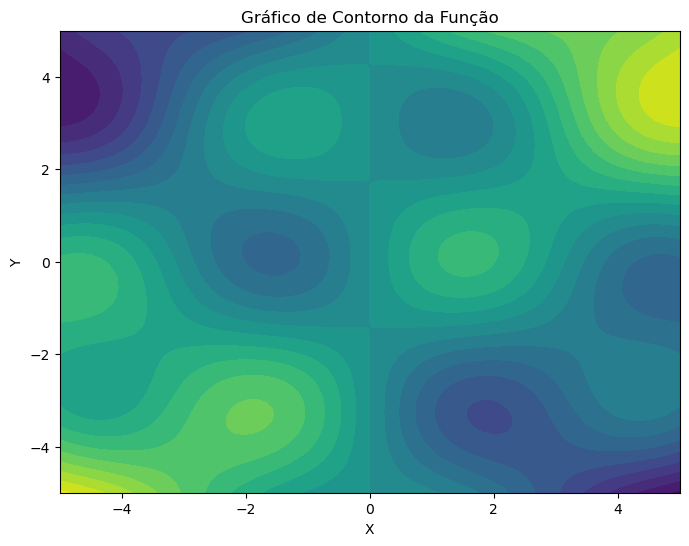

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a semente aleatória para reprodutibilidade
np.random.seed(42)

# Definindo uma função complexa
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Criando uma grade para o gráfico de contorno
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = complex_function(X, Y)

# Plotando o contorno
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Contorno da Função')
plt.show()

> *Figura: Gráfico de contorno da função $f(x, y) = \sin(x)\cos(y) + 0{,}1 \cdot xy$, mostrando padrões complexos em tons de verde-amarelo (viridis).*

### Gerando o Conjunto de Dados

A IA é útil quando temos dados representando a saída desejada e queremos aprender um modelo para emular a função subjacente. Vamos emular isso amostrando aleatoriamente a função algumas vezes para criar um conjunto de dados:

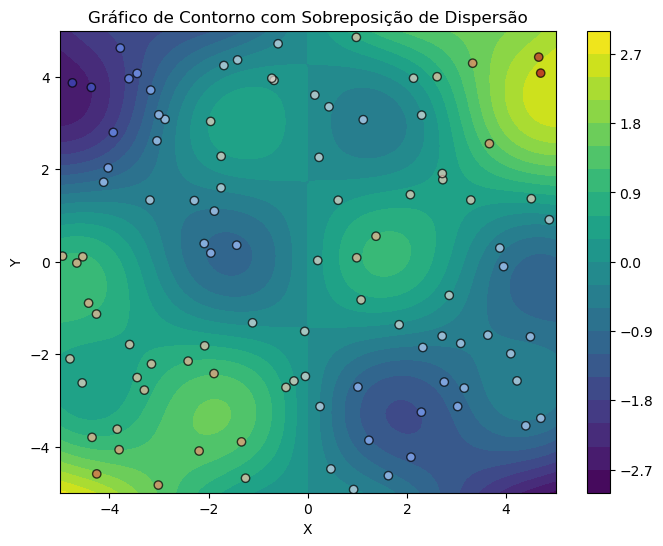

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo a semente aleatória para reprodutibilidade
np.random.seed(42)

# Definindo a função complexa
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Gerando o conjunto de dados
N = 100  # Número de amostras
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y)  # Calculando os valores da função

# Criando uma grade para o gráfico de contorno
X, Y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
Z = complex_function(X, Y)

# Plotando o contorno
plt.figure(figsize=(8, 6))
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis')
plt.colorbar(contour)  # Adicionando barra de cores para referência

# Gráfico de dispersão com cores baseadas nos valores da função
plt.scatter(x, y, c=z, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gráfico de Contorno com Sobreposição de Dispersão')
plt.show()

> *Figura: Amostragem da função para criar um conjunto de dados para treinar o modelo — gráfico de contorno com pontos de dados sobrepostos em cores variando de azul (valores negativos) a vermelho (valores positivos).*

### Treinando a Rede Neural (Sem Dropout)

Nosso objetivo nesse problema de exemplo é aprender um modelo de IA que possa recriar fielmente a função original após o treinamento com base em nosso conjunto de dados limitado:

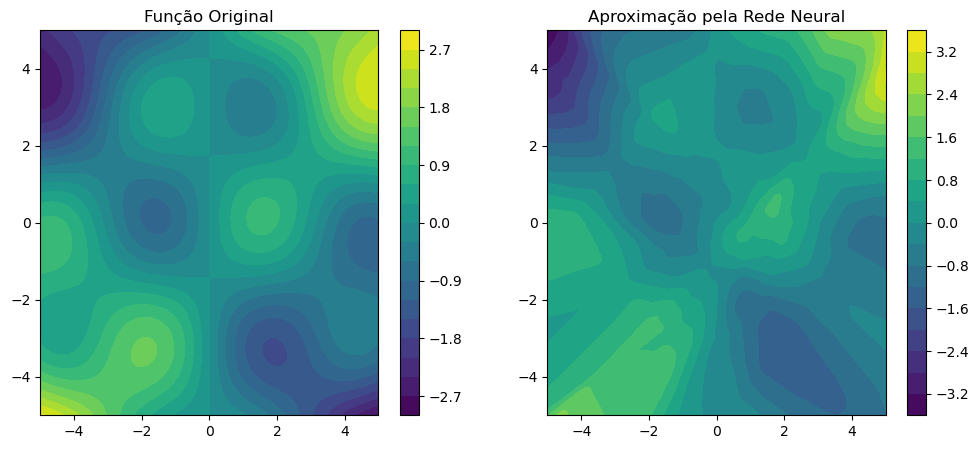

In [3]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Definindo sementes aleatórias para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# Definindo a função complexa
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Gerando o conjunto de dados
N = 100  # Número de amostras
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y)

# Convertendo para tensores PyTorch
X_train = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
y_train = torch.tensor(z, dtype=torch.float32).unsqueeze(1)

# Definindo um modelo de rede neural (sem dropout)
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)   # Camada totalmente conectada: 2 entradas → 64 neurônios
        self.fc2 = nn.Linear(64, 64)  # Camada oculta: 64 → 64
        self.fc3 = nn.Linear(64, 1)   # Camada de saída: 64 → 1

    def forward(self, x):
        x = torch.relu(self.fc1(x))   # Ativação ReLU na primeira camada
        x = torch.relu(self.fc2(x))   # Ativação ReLU na segunda camada
        x = self.fc3(x)               # Saída linear (sem ativação)
        return x

# Inicializando o modelo, função de perda e otimizador
model = NeuralNetwork()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()  # Erro Quadrático Médio

# Treinando o modelo
n_epochs = 5000
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()        # Zerando os gradientes
    output = model(X_train)      # Passagem para frente (forward pass)
    loss = criterion(output, y_train)
    loss.backward()              # Retropropagação (backward pass)
    optimizer.step()             # Atualizando os parâmetros

# Gerando grade de alta resolução para visualização
grid_size = 100
grid_x, grid_y = np.meshgrid(np.linspace(-5, 5, grid_size), np.linspace(-5, 5, grid_size))
grid_points = torch.tensor(np.column_stack((grid_x.ravel(), grid_y.ravel())), dtype=torch.float32)

# Calculando os valores reais da função
true_values = complex_function(grid_x, grid_y)

# Calculando as previsões do modelo
model.eval()  # Modo de avaliação (desativa dropout)
with torch.no_grad():
    predicted_values = model(grid_points).numpy().reshape(grid_x.shape)

# Plotando a comparação lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de contorno da função original
contour1 = axes[0].contourf(grid_x, grid_y, true_values, levels=20, cmap='viridis')
fig.colorbar(contour1, ax=axes[0])
axes[0].set_title("Função Original")

# Gráfico de contorno da função aprendida pela rede neural
contour2 = axes[1].contourf(grid_x, grid_y, predicted_values, levels=20, cmap='viridis')
fig.colorbar(contour2, ax=axes[1])
axes[1].set_title("Aproximação pela Rede Neural")

plt.show()

> *Figura: Comparação lado a lado — Função Original (esquerda) vs. Aproximação pela Rede Neural (direita), treinada com 100 amostras. A aproximação captura os padrões gerais, mas com imprecisões.*

In [ ]:
### Adicionando Ruído ao Conjunto de Dados

No mundo real, os dados costumam ser caros e ruidosos. Não apenas os cientistas de dados trabalham com dados limitados, mas geralmente há uma aleatoriedade imperfeita na relação entre entrada e saída.

Se adicionarmos um pouco de ruído aos dados de treinamento:

```python
# ...
# Gerando o conjunto de dados com ruído
N = 100  # Número de amostras
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y)

# Adicionando ruído gaussiano com média 0 e desvio padrão 0.3
z = z + np.random.normal(0, 0.3, N)
# ...
```

![](https://miro.medium.com/v2/resize:fit:1100/format:webp/1*KmtMiDrvRgKxRfnY3W-8SQ.png)
> *Figura: Com ruído e dados limitados, o modelo produz uma "interpretação artística" — o resultado sem dropout fica muito errático, com padrões espalhados que não correspondem à função original.*

A razão pela qual obtemos uma saída tão caótica é que temos uma quantidade limitada de dados de treinamento com ruído. À medida que o modelo aprende com esses dados, ele aprende a memorizar as peculiaridades dos dados em vez de aprender as características subjacentes do problema.

### Aplicando Dropout

Para aplicar dropout, basta inserir `nn.Dropout` ao longo do modelo:

```python
# Definindo a rede neural COM dropout
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_rate):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.dropout1 = nn.Dropout(dropout_rate)  # Dropout após a primeira camada
        self.fc2 = nn.Linear(64, 64)
        self.dropout2 = nn.Dropout(dropout_rate)  # Dropout após a segunda camada
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)            # Desativa aleatoriamente neurônios
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)            # Desativa aleatoriamente neurônios
        x = self.fc3(x)
        return x
```

O parâmetro `dropout_rate` define a porcentagem de tempo em que os neurônios são desativados aleatoriamente durante o processo de treinamento.

### Comparando Diferentes Taxas de Dropout

Aqui está o código completo comparando o mesmo problema com diferentes percentuais de dropout:

Treinando modelo com taxa de dropout: 0.0
Treinando modelo com taxa de dropout: 0.2
Treinando modelo com taxa de dropout: 0.4
Treinando modelo com taxa de dropout: 0.6


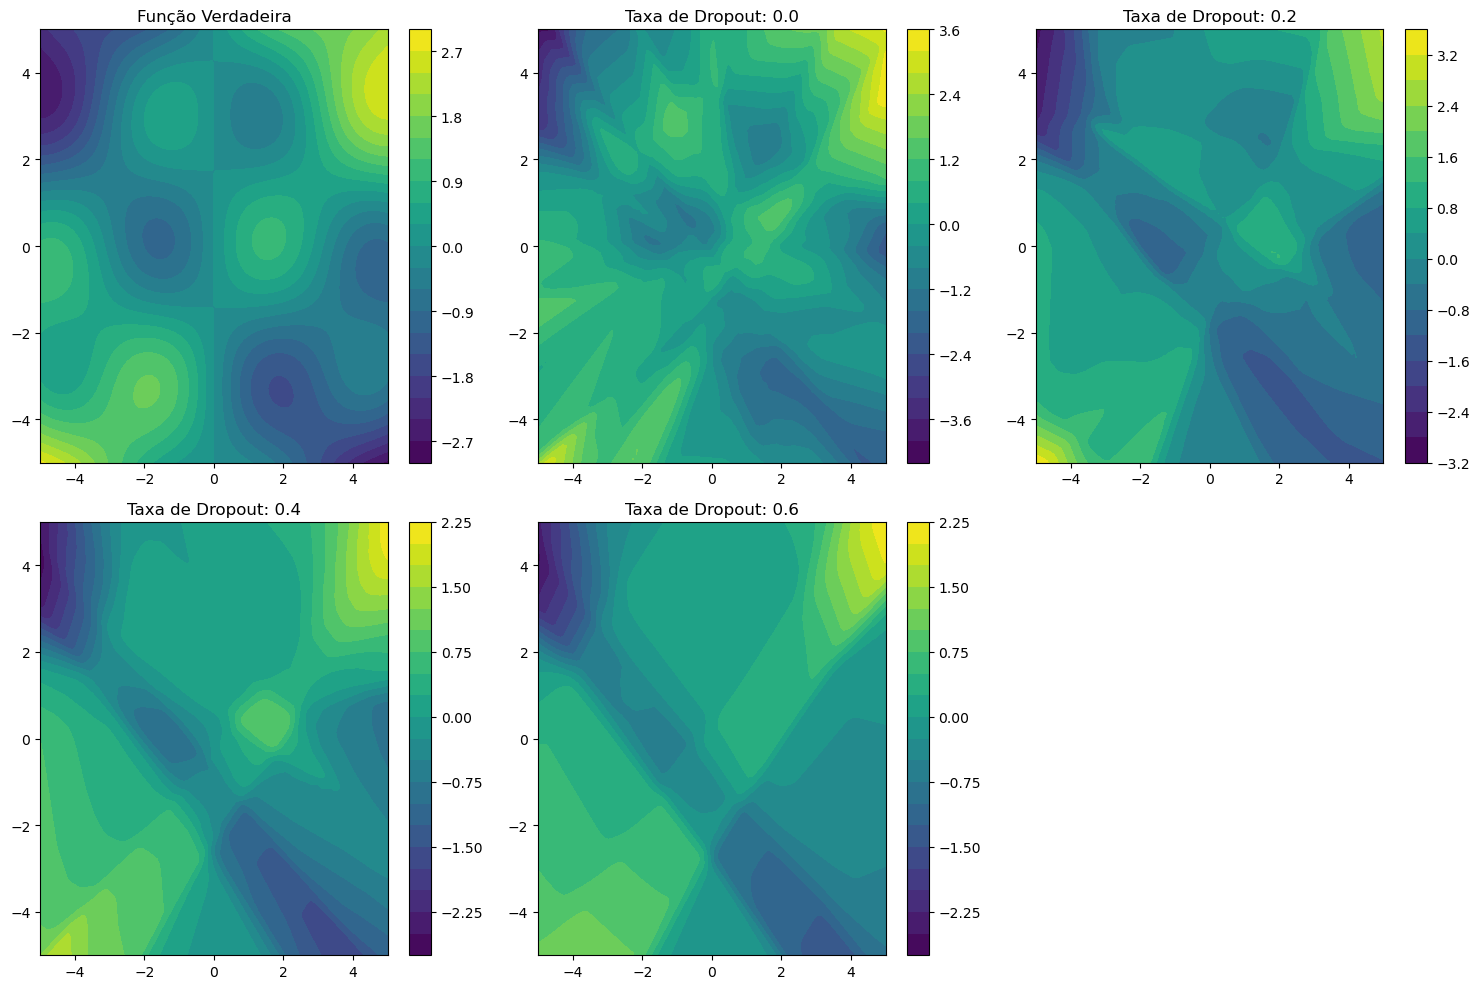

In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Definindo sementes para reprodutibilidade
torch.manual_seed(42)
np.random.seed(42)

# Definindo a função complexa
def complex_function(x, y):
    return np.sin(x) * np.cos(y) + 0.1 * x * y

# Gerando o conjunto de dados com ruído
N = 100  # Número de amostras
x = np.random.uniform(-5, 5, N)
y = np.random.uniform(-5, 5, N)
z = complex_function(x, y)
z = z + np.random.normal(0, 0.3, N)  # Adicionando ruído gaussiano

# Convertendo para tensores PyTorch
X_train = torch.tensor(np.column_stack((x, y)), dtype=torch.float32)
y_train = torch.tensor(z, dtype=torch.float32).unsqueeze(1)

# Rede neural com dropout configurável
class NeuralNetwork(nn.Module):
    def __init__(self, dropout_rate):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(2, 64)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(64, 64)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Treinando múltiplos modelos com diferentes taxas de dropout
dropout_rates = [0.0, 0.2, 0.4, 0.6]
n_epochs = 5000
models = {}

for rate in dropout_rates:
    print(f"Treinando modelo com taxa de dropout: {rate}")
    model = NeuralNetwork(rate)
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.MSELoss()

    for epoch in range(n_epochs):
        model.train()          # Modo de treinamento (ativa dropout)
        optimizer.zero_grad()
        output = model(X_train)
        loss = criterion(output, y_train)
        loss.backward()
        optimizer.step()

    models[rate] = model  # Armazenando o modelo treinado

# Gerando grade de alta resolução para visualização
grid_size = 100
grid_x, grid_y = np.meshgrid(np.linspace(-5, 5, grid_size), np.linspace(-5, 5, grid_size))
grid_points = torch.tensor(np.column_stack((grid_x.ravel(), grid_y.ravel())), dtype=torch.float32)

# Calculando os valores reais da função
true_values = complex_function(grid_x, grid_y)

# Plotando a função verdadeira
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
contour1 = plt.contourf(grid_x, grid_y, true_values, levels=20, cmap='viridis')
plt.colorbar()
plt.title('Função Verdadeira')

# Visualizando as previsões de cada modelo com diferentes taxas de dropout
for i, rate in enumerate(dropout_rates):
    models[rate].eval()     # Modo de avaliação (DESATIVA dropout para previsão)
    with torch.no_grad():
        predictions = models[rate](grid_points).numpy().reshape(grid_x.shape)

    plt.subplot(2, 3, i + 2)
    contour2 = plt.contourf(grid_x, grid_y, predictions, levels=20, cmap='viridis')
    plt.colorbar()
    plt.title(f'Taxa de Dropout: {rate}')

plt.tight_layout()
plt.show()

> *Figura: Comparação entre a Função Verdadeira e as aproximações com diferentes taxas de dropout (0.0, 0.2, 0.4 e 0.6). Observe como a estrutura da saída fica progressivamente mais simples conforme o dropout aumenta.*

## model.eval() vs model.train()

No PyTorch, quando você cria um modelo, ele está no **modo de treinamento** por padrão, o que habilita funcionalidades específicas de treinamento como o dropout. Ao configurar um modelo para `eval()`, o dropout é removido, permitindo que os dados passem pelo modelo sem desativação aleatória.

| Modo | Método | Dropout |
|------|--------|---------|
| Treinamento | `model.train()` | ✅ Ativo |
| Avaliação/Inferência | `model.eval()` | ❌ Desativado |

Normalmente, usa-se dropout ao **treinar** um modelo e não ao **testá-lo** ou **aplicá-lo** a um problema.

## Observações Sobre os Resultados

Observe como a estrutura da saída é significativamente mais simples para modelos com dropout. Isso está alinhado com a ideia de que o dropout **encoraja o modelo a aprender ideias mais gerais** e **desencoraja o overfitting**.

É claro que a decisão de "melhor" ou "pior" depende inteiramente da aplicação. Ao trabalhar com modelos grandes em domínios complexos, alguma quantidade de dropout praticamente garante melhor desempenho do modelo. Isso acontece porque:

- Modelos grandes têm um grande número de parâmetros
- São tipicamente aplicados a problemas muito ruidosos
- Têm uma natureza subjacente muito complexa

## Conclusão

Neste artigo, discutimos o **dropout**, uma ferramenta simples, mas fundamental, no arsenal do cientista de dados. Ao explorar o dropout, discutimos como as redes neurais podem aprender coisas subótimas durante o treinamento e a importância de encorajar o aprendizado generalizado em sistemas de IA.

Em seguida, exploramos como o dropout — o processo de desativar aleatoriamente certas partes do modelo durante o processo de treinamento — pode ser crítico para encorajar o aprendizado generalizado. Discutimos a intuição sobre o porquê isso funciona sob três perspectivas:

1. **Redução da co-adaptação**: quebra ciclos de retroalimentação entre neurônios
2. **Representações redundantes**: força o modelo a aprender múltiplas formas de resolver o problema
3. **Ruído**: impede a memorização simplista por aleatoriedade intrínseca

Por fim, experimentamos o dropout no PyTorch, observando empiricamente como diferentes taxas afetam a generalização do modelo.

